In [1]:
from dlcliche.notebook import *
import sys
sys.path.append('..')
from dadgt.dadgt_utils import *
from utils.mvtecad import *

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('GPU：', device)

DATA_ROOT = Path('/data/mvtec_ad/original')

SIZE = 256
params = EasyDict()
params.seed = 1234
params.fit = {}
params.fit.validation_split = 0.1
params.fit.lr = 0.0003
params.fit.b1 = 0.95
params.fit.b2 = 0.999
params.fit.weight_decay = 0.0
params.fit.batch_size = 64
params.fit.epochs = 50
params.fit.show_progress = False
params.data = {}
params.data.load_size = SIZE + (SIZE // 50)
params.data.crop_size = SIZE
params.work_folder = 'tmp'
params.suffix = '.png'
params.project = f'Bottle-GT4-{SIZE}'
params.ds_cls = GeoTfm4Dataset
params.n_class = params.ds_cls.n_tfm()
ensure_folder(params.work_folder)

params

GPU： cuda:0


{'data': {'crop_size': 256, 'load_size': 261},
 'ds_cls': dadgt.dadgt_utils.GeoTfm4Dataset,
 'fit': {'b1': 0.95,
  'b2': 0.999,
  'batch_size': 64,
  'epochs': 50,
  'lr': 0.0003,
  'show_progress': False,
  'validation_split': 0.1,
  'weight_decay': 0.0},
 'n_class': 4,
 'project': 'Bottle-GT4-256',
 'seed': 1234,
 'suffix': '.png',
 'work_folder': 'tmp'}

Evaluating: ['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper']

--- Start evaluating [bottle] ----
 preprocessing...
torch.Size([64, 3, 256, 256]) torch.Size([64]) 836 14 4
 training...
 loading checkpoint: tmp/weights-bottle-epoch=2-val_loss=0.00.ckpt
 evaluating...
Results: {'target': ['bottle'], 'auc': [0.8746031746031746]}

--- Start evaluating [cable] ----
 preprocessing...
torch.Size([64, 3, 256, 256]) torch.Size([64]) 896 14 4
 training...
 loading checkpoint: tmp/weights-cable-epoch=1-val_loss=0.00.ckpt
 evaluating...
Results: {'target': ['cable'], 'auc': [0.8695652173913043]}

--- Start evaluating [capsule] ----
 preprocessing...
torch.Size([64, 3, 256, 256]) torch.Size([64]) 876 14 4
 training...
 loading checkpoint: tmp/weights-capsule-epoch=45-val_loss=0.00.ckpt
 evaluating...
Results: {'target': ['capsule'], 'auc': [0.738731551655365]}

--- Start evaluating [carpet] ---

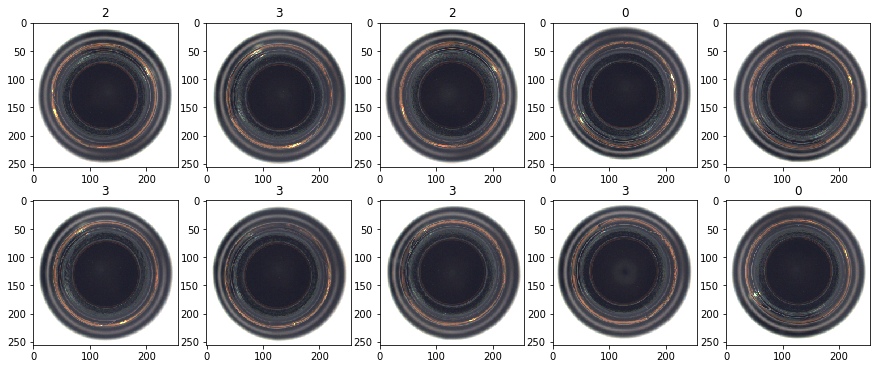

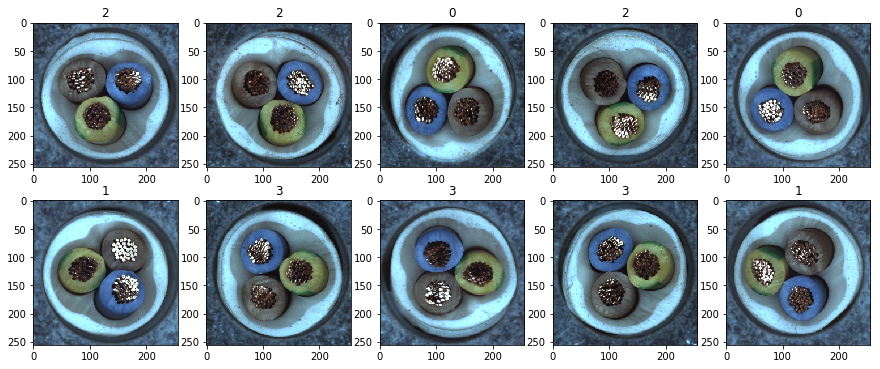

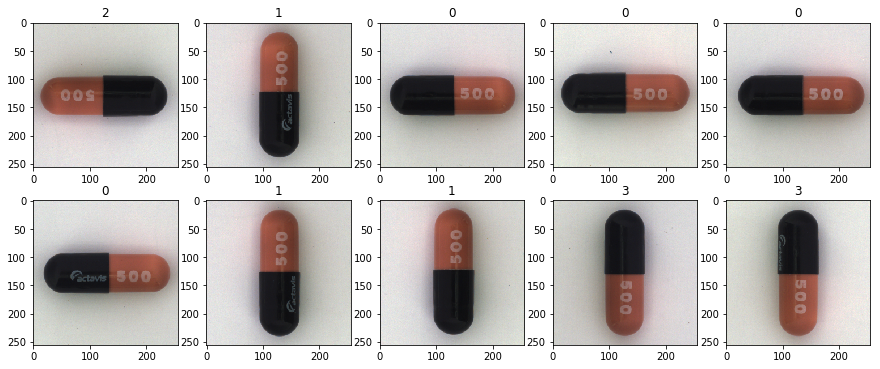

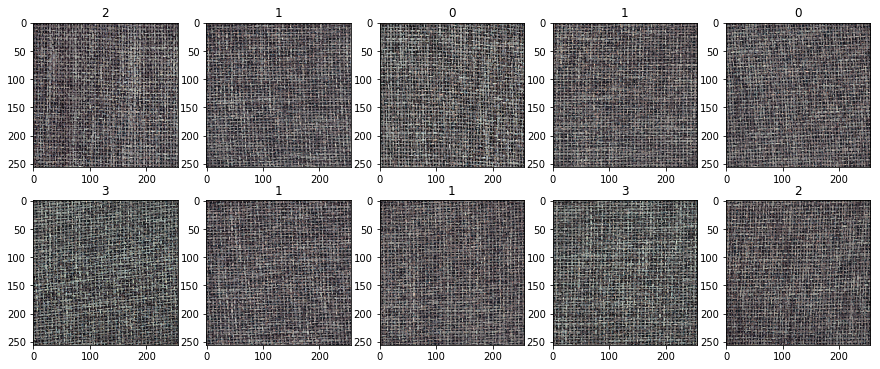

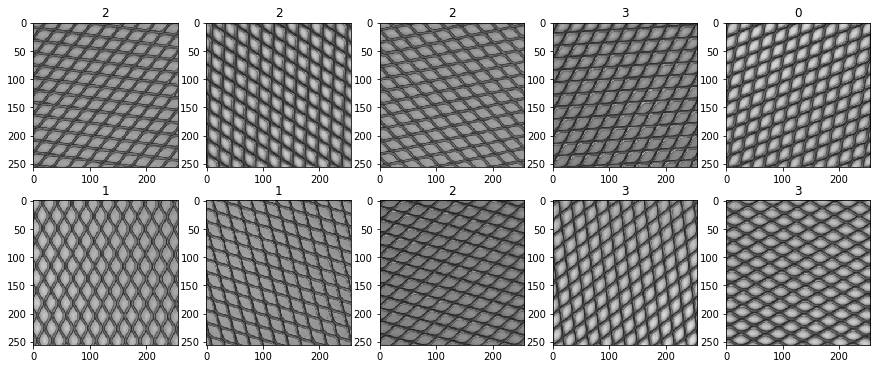

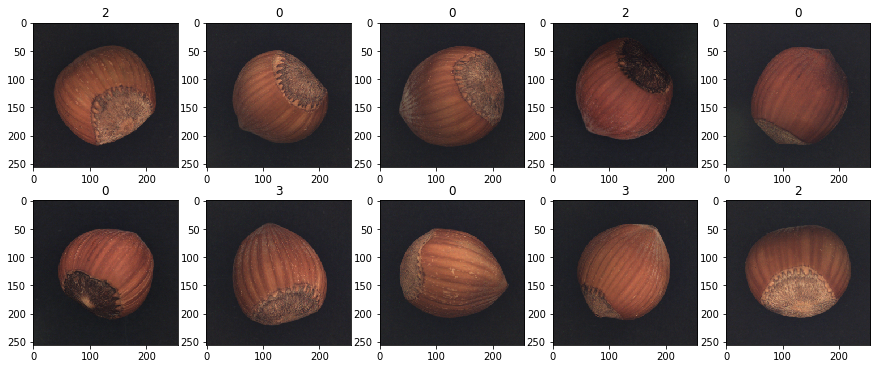

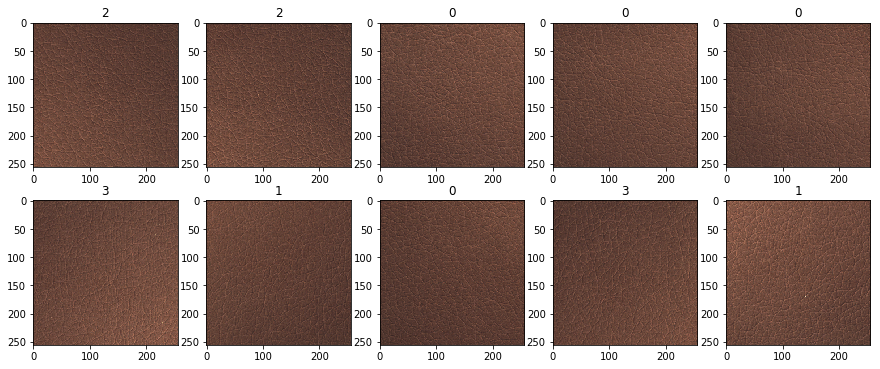

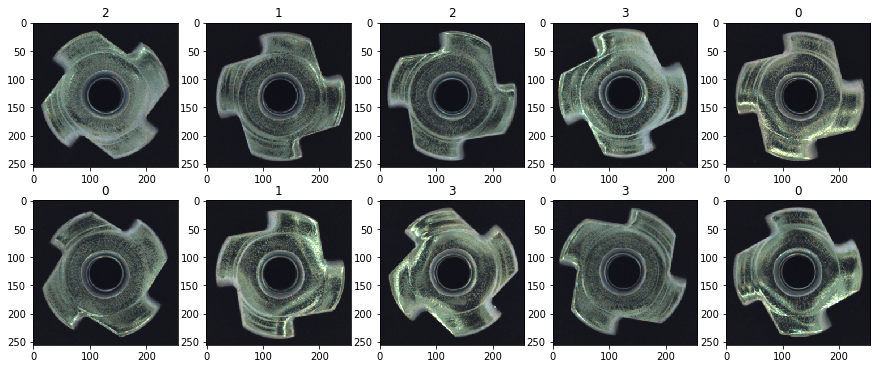

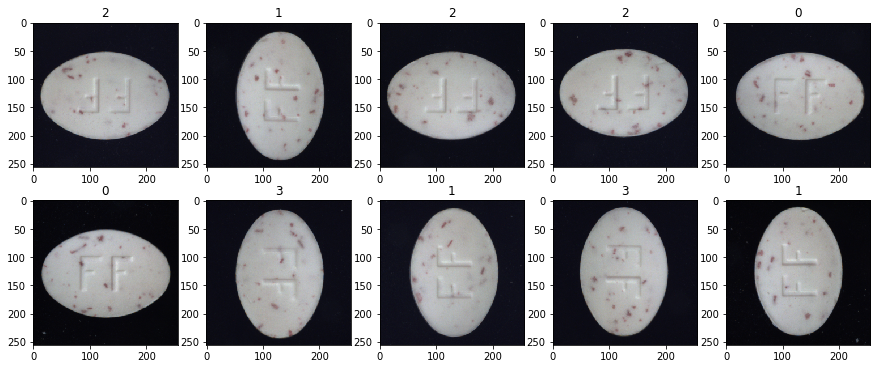

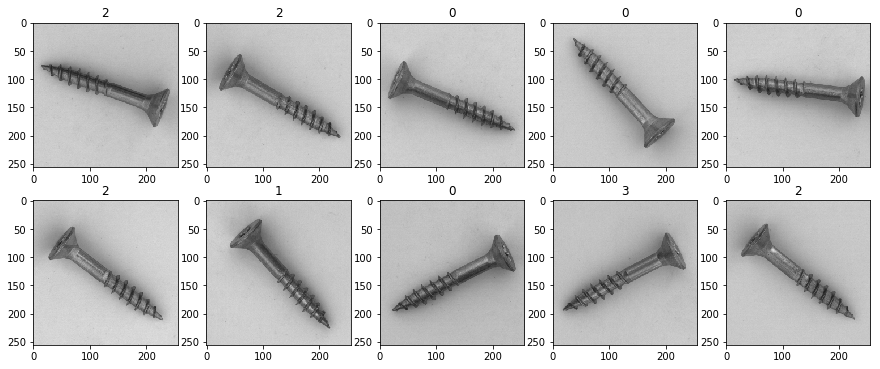

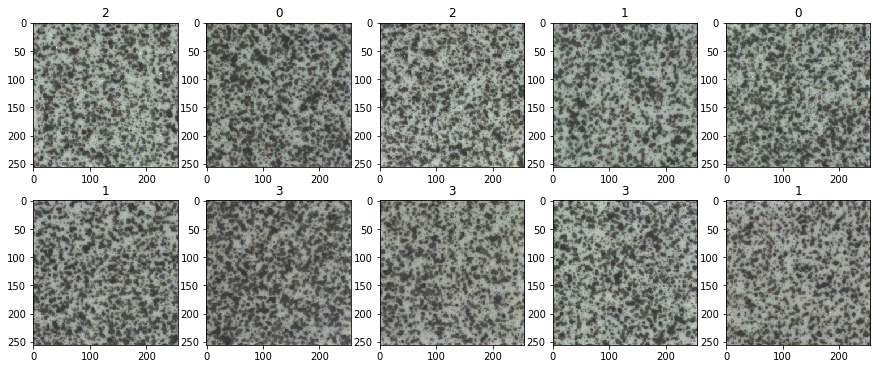

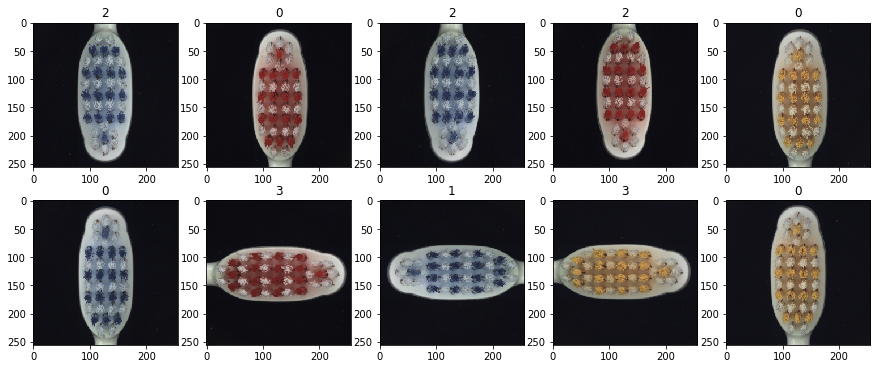

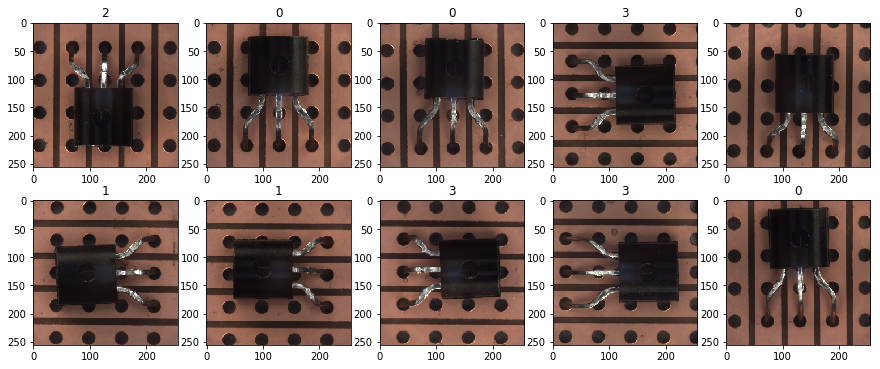

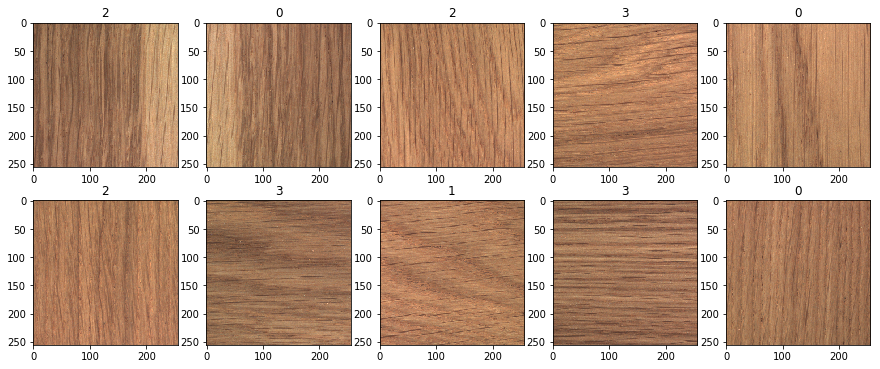

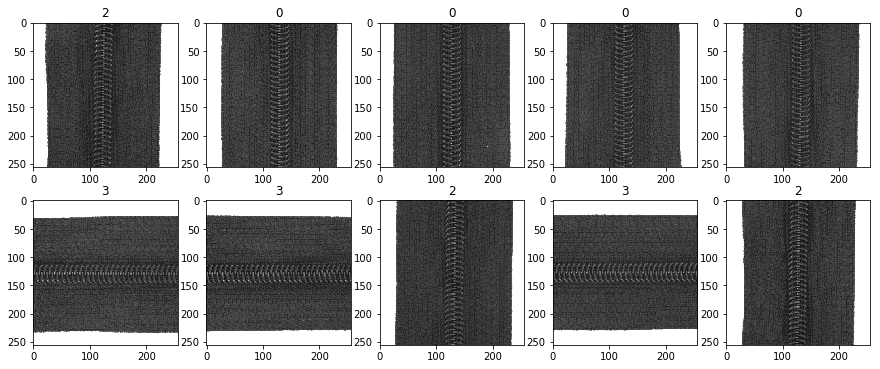

In [2]:
results = evaluate_MVTecAD(DATA_ROOT, DADGT, params)

In [4]:
results.set_index('target')

auc
target              
bottle      0.874603
cable       0.869565
capsule     0.738732
carpet      0.440209
grid        0.390977
hazelnut    0.598214
leather     0.581182
metal_nut   0.844086
pill        0.612111
screw       0.369338
tile        0.458153
toothbrush  0.790278
transistor  0.886250
wood        0.853509
zipper      0.781775